In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [16]:
df= pd.read_csv(r'C:\Users\cooch\Documents\movies.csv')
#let's take a look at the data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NA,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,0.0,NaN,90
7664,Dream Round,NA,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,0.0,Cactus Blue Entertainment,90
7665,Saving Mbango,NA,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,0.0,Embi Productions,0
7666,It's Just Us,NA,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000.0,0.0,NaN,120


In [10]:
# Let's loop through the data and see if there is anything missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [11]:
print(df.dtypes)


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [17]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['score']=df['score'].astype('int64')

In [18]:

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NA,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90
7664,Dream Round,NA,Comedy,2020,"February 7, 2020 (United States)",4,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,NA,Drama,2020,"April 27, 2020 (Cameroon)",5,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,NA,Drama,2020,"October 1, 2020 (United States)",0,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120


In [19]:
#dropping duplicates
df.drop_duplicates()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NA,Drama,2020,"October 23, 2020 (United States)",3,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90
7664,Dream Round,NA,Comedy,2020,"February 7, 2020 (United States)",4,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,NA,Drama,2020,"April 27, 2020 (Cameroon)",5,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,NA,Drama,2020,"October 1, 2020 (United States)",0,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120


Text(0, 0.5, 'Gross Earnings in billions')

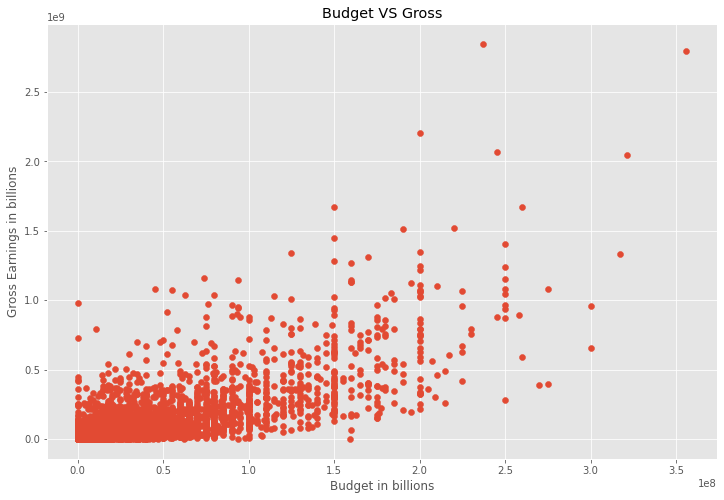

In [22]:
#Scatter plot for budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title("Budget VS Gross")
plt.xlabel("Budget in billions")
plt.ylabel("Gross Earnings in billions")

In [24]:
df= df.sort_values(by=['gross'], inplace=False, ascending=False)

<AxesSubplot:xlabel='budget', ylabel='gross'>

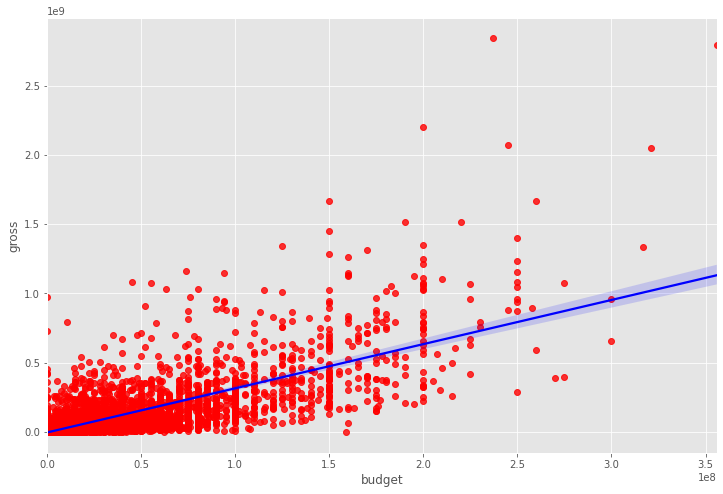

In [27]:
#plotting budget vs gross using seamans regplot

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

<function matplotlib.pyplot.show(close=None, block=None)>

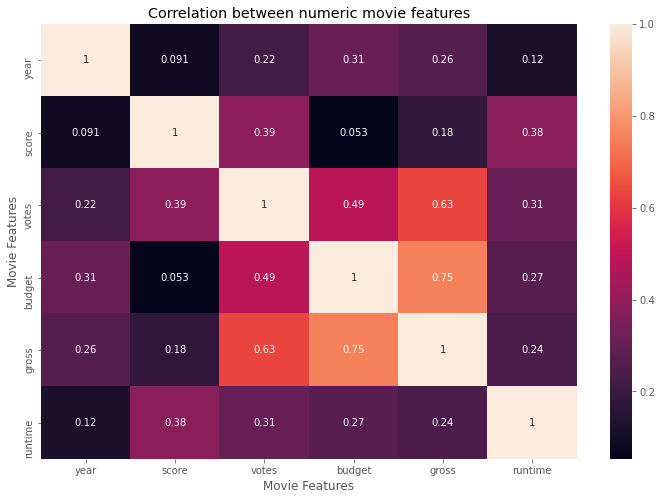

In [29]:
#visualizing the correlation matrix

corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation between numeric movie features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show

In [32]:
#categorizing non-numeric data for correlation

df_categorized=df

for col in df_categorized.columns:
    if(df_categorized[col].dtype=='object'):
        df_categorized[col]=df_categorized[col].astype('category')
        df_categorized[col]=df_categorized[col].cat.codes
        
df_categorized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,6,0,2009,696,7,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,6,0,2019,183,8,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,6,6,1997,704,7,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,6,0,2015,698,7,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,6,0,2018,192,8,897000,162,743,2241,55,321000000,2048359754,1606,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,7211,7,3,1987,845,6,3300,66,3780,701,55,5800000,0,1323,94
1199,7208,5,4,1987,83,4,1400,1877,3645,462,55,0,0,1637,86
1192,7336,7,10,1987,1754,6,2200,745,682,596,54,0,0,1681,110
1184,1355,7,10,1987,2914,4,2100,613,925,1627,55,75000,0,2219,72


<function matplotlib.pyplot.show(close=None, block=None)>

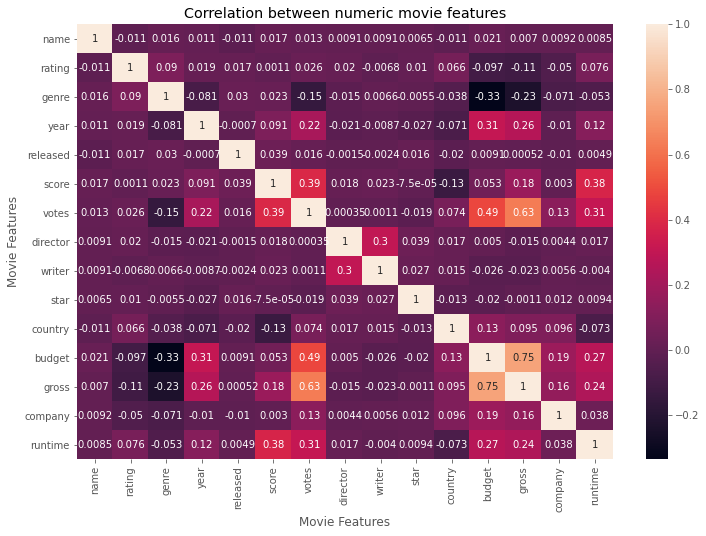

In [34]:
#visualizing the new correlation matrix

corr_matrix=df_categorized.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation between numeric movie features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show

In [38]:
corr_pairs=df_categorized.corr().unstack()
corr_pairs=corr_pairs.sort_values()
corr_pairs[(corr_pairs)>0.5]

gross     votes       0.632870
votes     gross       0.632870
budget    gross       0.750157
gross     budget      0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#Hence, we can say that Budget and Votes have the highest correlation to the gross earnings